# EKANSH
# HANDWRITTEN TEXT RECOGNITION PROJECT

# Capturing Images

In [2]:
def one_time():
    import pyscreenshot as ImageGrab
    import time

    images_folder="Captured_Images/9/"

    for i in range(0,100):
        time.sleep(6)
        im=ImageGrab.grab(bbox=(50,200,500,650)) #x1,y1,x2,y2
        print("Saved......",i)
        im.save(images_folder+str(i)+'.png')
        print("Clear Screen AND Redraw Again........")

# Generate Dataset

In [1]:
import cv2 #OPENCV = IMAGE PROCESSING
import csv
import glob
 
header = ["Label"]
for i in range(0,784):
    header.append("Pixel"+str(i))
with open('DataSet.csv', 'a') as f:
    writer = csv.writer(f)
    writer.writerow(header)

for label in range(10):
    dirList = glob.glob("Captured_Images/"+str(label)+"/*.png")

    for img_path in dirList:
        im = cv2.imread(img_path)
        im_gray = cv2.cvtColor(im,cv2.COLOR_BGR2GRAY)
        im_gray = cv2.GaussianBlur(im_gray,(15,15), 0)
        roi = cv2.resize(im_gray,(28,28), interpolation=cv2.INTER_AREA)
        
        data=[]
        data.append(label)
        
        rows, columns = roi.shape

        ## Adding pixels one by one into Data Array
        for i in range(rows):
            for j in range(columns):
                k = roi[i,j]
                if k>100:
                    k=1
                else:
                    k=0
                data.append(k)
        with open('DataSet.csv', 'a') as f:
            writer = csv.writer(f)
            writer.writerow(data)

# Loading Dataset 

In [1]:
import pandas as pd
from sklearn.utils import shuffle

data = pd.read_csv('DataSet.csv')
data = shuffle(data)
data

,Label,Pixel0,Pixel1,Pixel2,Pixel3,Pixel4,Pixel5,Pixel6,Pixel7,Pixel8,...,Pixel774,Pixel775,Pixel776,Pixel777,Pixel778,Pixel779,Pixel780,Pixel781,Pixel782,Pixel783
645,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
136,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
899,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
355,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
92,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
370,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
308,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
597,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
905,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Seperating Dependent and Independent Variable

In [2]:
X = data.drop(["Label"], axis=1) # INDEPENDENT
Y = data["Label"] # DEPENDENT

# Preview of one image using Matplotlib

2


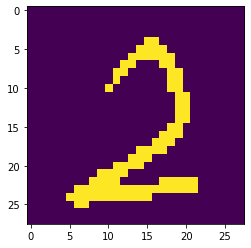

In [4]:
%matplotlib inline

import matplotlib.pyplot as plt
import cv2

idx = 247
img = X.loc[idx].values.reshape(28,28)

plt.imshow(img)
print(Y[idx])

# Train-Test Split

In [5]:
from sklearn.model_selection import train_test_split

train_x,test_x,train_y,test_y = train_test_split(X,Y, test_size = 0.2)

# Fit the Model using SVC and save the Model using JobLib

In [6]:
import joblib
from sklearn.svm import SVC # SVC = SVM = SUPPORT VECTOR MACHINE

classifier = SVC(kernel="linear", random_state=6)
classifier.fit(train_x,train_y)

joblib.dump(classifier, "Model/Digit_Recognizer")

['Model/Digit_Recognizer']

# Calculating Accuracy

In [7]:
from sklearn import metrics

prediction = classifier.predict(test_x)

print("Accuracy = ", metrics.accuracy_score(prediction, test_y))

Accuracy =  0.97


# Predicting Images

In [3]:
import joblib
import cv2
import numpy as np
import time
import pyscreenshot as ImageGrab
 
model = joblib.load("Model/Digit_Recognizer")
images_folder = "Img/"
 
while True:
    img=ImageGrab.grab(bbox=(50,200,500,650))

    img.save(images_folder+"Img.png")
    im = cv2.imread(images_folder+"Img.png")
    im_gray = cv2.cvtColor(im,cv2.COLOR_BGR2GRAY)
    im_gray = cv2.GaussianBlur(im_gray, (15,15), 0)

    #Thresholding the Image
    ret, im_th = cv2.threshold(im_gray,100, 255, cv2.THRESH_BINARY)
    roi = cv2.resize(im_th, (28,28), interpolation = cv2.INTER_AREA)

    rows,columns = roi.shape

    X = []
   
   ## Adding pixel one by one into Data Array
    for i in range(rows):
        for j in range(columns):
            k = roi[i,j]
            if k>100:
                k=1
            else:
                k=0
            X.append(k)
           
    predictions = model.predict([X])
    print("Prediction: ", predictions[0])
    cv2.putText(im, "THE PREDICTION: " + str(predictions[0]), (30,30), 0, 0.7,(0,255,0),2,cv2.LINE_AA)

    cv2.startWindowThread()
    cv2.namedWindow("Result")
    cv2.imshow("Result", im)
    
    cv2.waitKey(10000)
    
    if cv2.waitKey(1)==13: #27 is the ASCII Value of ESC, 13 is the ASCII value of Enter
        break
        
cv2.destroyAllWindows()

Prediction:  1
Prediction:  7
Prediction:  8
Prediction:  8
